In [30]:
# Music Classification - CSCI 4622 Final Project
# Giovanni Visco, Ishan Kumar, Avnish Asthana, Dhruv Patel

# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

import librosa 
from librosa import feature
from librosa import display
genres = ['blues', 'classical','country','disco', 'hiphop', 'jazz','metal', 'pop', 'reggae', 'rock']

In [31]:
# list data
for dirname, _, filenames in os.walk('./data/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./data/.DS_Store
./data/pop/pop.00080.au
./data/pop/pop.00022.au
./data/pop/pop.00073.au
./data/pop/pop.00047.au
./data/pop/pop.00016.au
./data/pop/pop.00006.au
./data/pop/pop.00057.au
./data/pop/pop.00063.au
./data/pop/pop.00032.au
./data/pop/pop.00090.au
./data/pop/pop.00012.au
./data/pop/pop.00043.au
./data/pop/pop.00084.au
./data/pop/pop.00077.au
./data/pop/pop.00026.au
./data/pop/pop.00036.au
./data/pop/pop.00067.au
./data/pop/pop.00094.au
./data/pop/pop.00053.au
./data/pop/pop.00002.au
./data/pop/pop.00013.au
./data/pop/pop.00042.au
./data/pop/pop.00085.au
./data/pop/pop.00076.au
./data/pop/pop.00027.au
./data/pop/pop.00037.au
./data/pop/pop.00066.au
./data/pop/pop.00095.au
./data/pop/pop.00052.au
./data/pop/pop.00003.au
./data/pop/pop.00081.au
./data/pop/pop.00023.au
./data/pop/pop.00072.au
./data/pop/pop.00046.au
./data/pop/pop.00017.au
./data/pop/pop.00007.au
./data/pop/pop.00056.au
./data/pop/pop.00062.au
./data/pop/pop.00033.au
./data/pop/pop.00091.au
./data/pop/pop.00028.au

In [26]:
# load audio time series into a list using librosa.load, create list of corresponding labels
time_series = []
sampling_rates = []
labels = []
for genre in genres:
    # identify the path using the genre
    path = './data/' + genre
    # loop through every file in the path
    for file in os.listdir(path):
        filename = path + '/' + file
        y, sr = librosa.load(filename)
        time_series.append(y)
        sampling_rates.append(sr)
        labels.append(genre)

[Text(0.5, 1.0, 'Chromagram')]

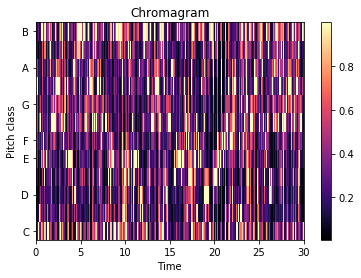

In [47]:
# attempt at feature extraction with librosa using one time series
chroma = feature.chroma_stft(y = time_series[0], sr = sampling_rates[0])
fig, ax = plt.subplots()
img = display.specshow(chroma, y_axis = 'chroma', x_axis = 'time', ax = ax)
fig.colorbar(img, ax = ax)
ax.set(title = "Chromagram")